In [5]:
# -*- coding: utf-8 -*-
%matplotlib inline
%load_ext autoreload
%autoreload 2

# add path
import sys
my_path = r'D:\Documents\etudes\epfl\MA1\cours\MachineLearning\Project1'
sys.path.insert(0,my_path + r'\code\COMMON')

# basic imports 
import numpy as np
from t_optimize_hyperparameters import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Build dataset

In [16]:
from proj1_helpers import load_csv_data 
from outliers import handle_outliers
from standard import standardize

# load raw data
y_raw, input_data_raw, ids = load_csv_data(my_path + r'\data\train.csv', sub_sample=False)

# handle outliers
X0, y = handle_outliers(input_data_raw, y_raw, -999, 'median')

# standardize
X0, mean_X0, std_X0 = standardize(X0)

-999 are replaced by the median value of the feature


# Build ridge regression model

In [17]:
# choose the features
ind_features = [12, 13, 1, 11, 22, 4, 19, 29, 16, 3, 23, 2, 7, 6, 21, 26, 18, 28, 9, 20, 14]
X = X0[:, ind_features]
print(X.shape)

# ridge regression parameters
arg_rr = dict()
arg_rr['method'] = 'rr'
arg_rr['loss'] = 'rmse'

(250000, 21)


# Optimize the degree of the polynomial basis function

tested degree:  [ 1  2  3  4  5  6  7  8  9 10 11 12] 

------------------------------------------ test with degree =  1
Number of samples in total:  250000
Number of folds:  10  of 25000 samples.
Mean training loss:  0.830327387154
Mean testing loss:  0.830423178062
------------------------------------------ test with degree =  2
Number of samples in total:  250000
Number of folds:  10  of 25000 samples.
Mean training loss:  0.805280833595
Mean testing loss:  0.806600851947
------------------------------------------ test with degree =  3
Number of samples in total:  250000
Number of folds:  10  of 25000 samples.
Mean training loss:  0.797852339823
Mean testing loss:  1.1242637322
------------------------------------------ test with degree =  4
Number of samples in total:  250000
Number of folds:  10  of 25000 samples.
Mean training loss:  1.18130486629
Mean testing loss:  5.74657297322
------------------------------------------ test with degree =  5
Number of samples in total:  250000

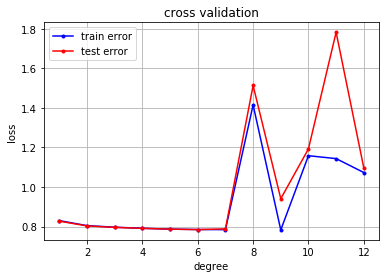

In [18]:
# other hyperparameters
arg_rr['lambda_'] = 0

# optimization parameters
degree_min = 1 
degree_max = 12
degree_steps = 1
arg_rr['k_fold'] = 10

# optimize degree
degree_opt = optimize_degree(y, X, degree_min, degree_max, degree_steps, arg_rr)

# Optimize the lambda_ for regularization

tested lambda_:  [  1.00000000e-20   1.29154967e-18   1.66810054e-16   2.15443469e-14
   2.78255940e-12   3.59381366e-10   4.64158883e-08   5.99484250e-06
   7.74263683e-04   1.00000000e-01] 

------------------------------------------ cross validation with lambda_ =  1e-20
Number of samples in total:  250000
Number of folds:  10  of 25000 samples.
Mean training loss:  0.785262639721
Mean testing loss:  966.123655818
------------------------------------------ cross validation with lambda_ =  1.29154966501e-18
Number of samples in total:  250000
Number of folds:  10  of 25000 samples.
Mean training loss:  0.786383889946
Mean testing loss:  966.124606033
------------------------------------------ cross validation with lambda_ =  1.6681005372e-16
Number of samples in total:  250000
Number of folds:  10  of 25000 samples.
Mean training loss:  0.91371396817
Mean testing loss:  966.232579031
------------------------------------------ cross validation with lambda_ =  2.15443469003e-14
Number 

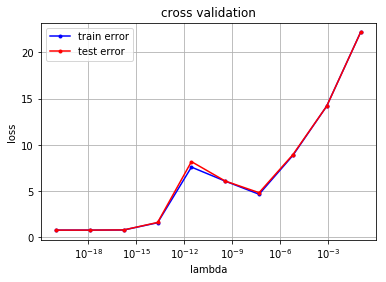

In [19]:
# ridge regression parameters
arg_rr = dict()
arg_rr['method'] = 'rr'
arg_rr['loss'] = 'rmse'
arg_rr['degree'] = degree_opt
arg_rr['k_fold'] = 10

# optimization parameters
lambda_min = -20 
lambda_max = -1
lambda_steps = 10

# optimize lambda_
lambda_opt = optimize_lambda(y, X, lambda_min, lambda_max, lambda_steps, arg_rr)